### Predicting and diagnosing heart disease is the biggest challenge in the medical industry and relies on factors such as the physical examination, symptoms and signs of the patient.

# Importing Basic Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df= pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# Features
#### 1. age: Age of the patient.

#### 2. sex: Sex of the patient (0 = female, 1 = male).

#### 3. cp: Chest pain type:
    0: Typical angina
    1: Atypical angina
    2: Non-anginal pain
    3: Asymptomatic
#### 4. trestbps: Resting blood pressure (in mm Hg).

#### 5. chol: Serum cholesterol level (in mg/dL).
 
#### 6. fbs: Fasting blood sugar level > 120 mg/dL (1 = true; 0 = false).

#### 7. restecg: Resting electrocardiographic results:
    0: Normal
    1: ST-T wave abnormality
    2: Left ventricular hypertrophy
#### 8. thalach: Maximum heart rate achieved.

#### 9. exang: Exercise induced angina (1 = yes; 0 = no).

#### 10. oldpeak: ST depression induced by exercise relative to rest.

#### 11. slope: The slope of the peak exercise ST segment:
    0: Upsloping
    1: Flat
    2: Downsloping

#### 12. ca: Number of major vessels (0-3) colored by fluoroscopy.

#### 13. thal: Thalassemia:
    1: Normal
    2: Fixed defect
    3: Reversible defect


## EDA for analyzing the data

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.age.corr(df.thalach)

-0.39852193812106734

<AxesSubplot:>

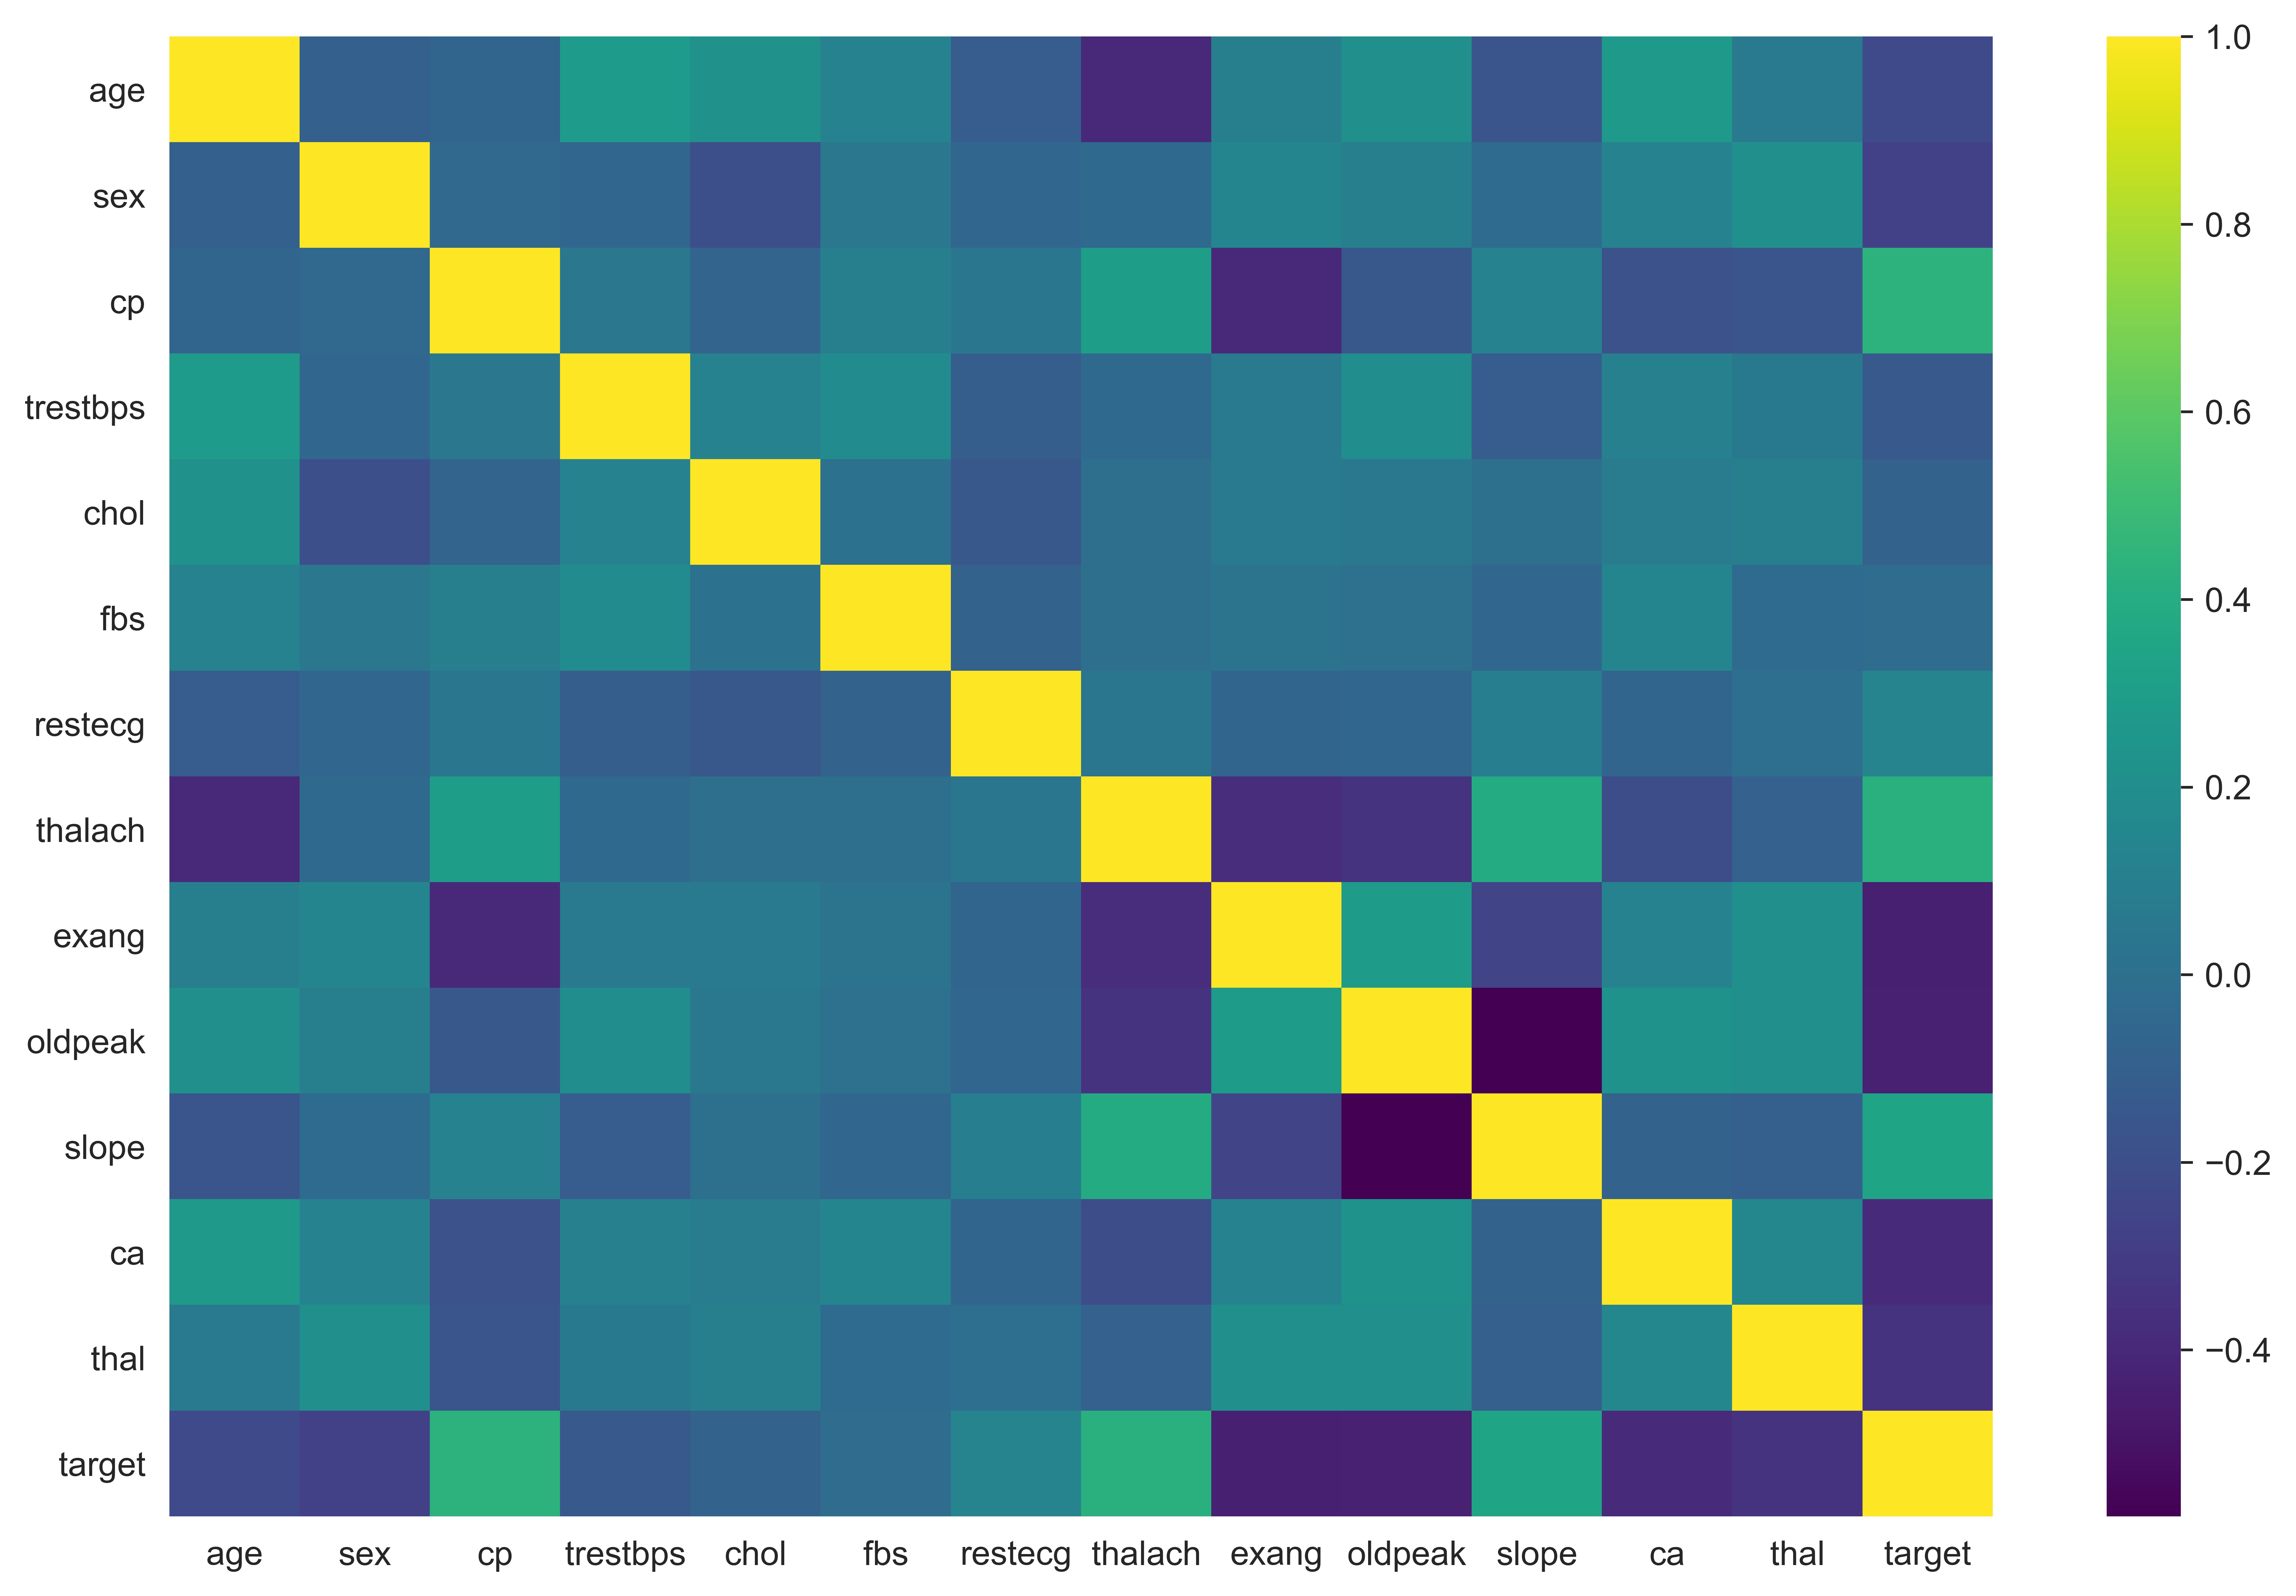

In [8]:
plt.figure(figsize=(12,8),dpi=800)
sns.heatmap(data = df.corr(),cmap='viridis')

<AxesSubplot:>

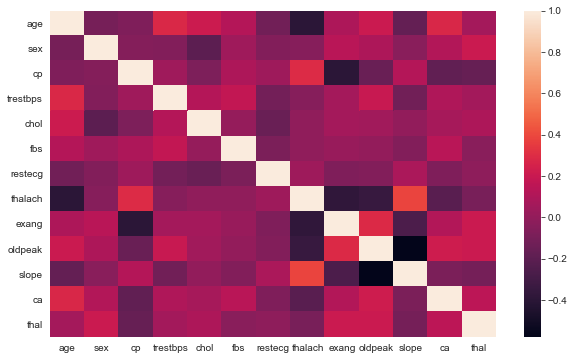

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['target']).corr())

## Splitting The Data


In [10]:
X = df.drop(columns=['target'])
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

## Scaling is done for gradient based models 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
scaled_x_train = scaler.fit_transform(X_train)

scaled_x_test = scaler.transform(X_test)


## Import sklearn packages and metrics

In [14]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

### Classification from LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='liblinear') 

In [16]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


<AxesSubplot:ylabel='Count'>

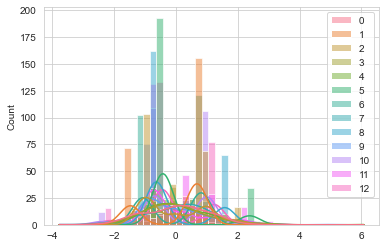

In [17]:
sns.histplot(scaled_x_train, kde = True)

In [18]:
scaled_x_test

array([[ 0.70128628, -1.46723474, -0.97253963, -0.12049927,  1.58971204,
        -0.4197211 , -1.07284159,  0.81620822, -0.63343079, -0.92956432,
         0.99270318, -0.71755059, -0.43333181],
       [ 0.81024726,  0.6815542 ,  0.        , -0.69394442,  0.65130696,
        -0.4197211 , -1.07284159, -2.15185769, -0.63343079,  0.35764937,
        -0.70160977,  0.23498733,  1.23389397],
       [ 0.59232531,  0.6815542 , -0.97253963, -0.86597797, -0.32540038,
         2.38253449,  0.81502694,  0.41147196,  1.57870443,  0.35764937,
         0.99270318,  1.18752525,  1.23389397],
       [ 0.59232531, -1.46723474, -0.97253963,  1.02639104,  0.2108311 ,
        -0.4197211 , -1.07284159,  0.27655987, -0.63343079,  1.46097539,
        -0.70160977,  1.18752525,  1.23389397],
       [ 0.04752043,  0.6815542 , -0.97253963,  0.45294588, -0.57436499,
        -0.4197211 ,  0.81502694, -1.79209213,  1.57870443,  4.21929044,
        -2.39592272, -0.71755059,  1.23389397],
       [ 0.37440335, -1.467234

In [19]:
scaled_x_train

array([[ 0.91920824, -1.46723474, -0.97253963, ..., -0.70160977,
         1.18752525, -0.43333181],
       [ 1.35505214,  0.6815542 , -0.97253963, ..., -0.70160977,
         1.18752525,  1.23389397],
       [-0.17040153,  0.6815542 ,  0.97253963, ..., -2.39592272,
        -0.71755059, -0.43333181],
       ...,
       [ 1.35505214, -1.46723474, -0.97253963, ...,  0.99270318,
         1.18752525, -0.43333181],
       [ 0.48336433, -1.46723474, -0.97253963, ..., -0.70160977,
        -0.71755059, -0.43333181],
       [ 0.26544238,  0.6815542 ,  0.97253963, ...,  0.99270318,
         0.23498733,  1.23389397]])

In [20]:
# fittin the model
logr.fit(scaled_x_train,y_train)

LogisticRegression(solver='liblinear')

In [21]:
logr_preds = logr.predict(scaled_x_test)

In [22]:
print('Confusion Matrix : ' )
print(confusion_matrix(y_test,logr_preds))

Confusion Matrix : 
[[32  9]
 [ 4 31]]


In [23]:
print(classification_report(y_test,logr_preds))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.78      0.89      0.83        35

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



## Decision Trees

In [24]:
print(accuracy_score(y_test,logr_preds))

0.8289473684210527


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
dtree_preds = dtree.predict(X_test)

In [28]:
print('Confusion Matrix : ' )
print(confusion_matrix(y_test,dtree_preds))
print('Classification Report: ')
print(classification_report(y_test,dtree_preds))

Confusion Matrix : 
[[28 13]
 [10 25]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.66      0.71      0.68        35

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.70      0.70      0.70        76



## Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print('Confusion Matrix : ' )
print(confusion_matrix(y_test,rfc_pred))

Confusion Matrix : 
[[31 10]
 [ 5 30]]


In [33]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.75      0.86      0.80        35

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



## Random forest with dummy variables

In [34]:
rf_df = pd.get_dummies(data = df, columns=['sex', 'cp', 'fbs', 'restecg', 
       'exang', 'slope', 'ca', 'thal' ],drop_first=True)

In [35]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
rf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_1      303 non-null    uint8  
 7   cp_1       303 non-null    uint8  
 8   cp_2       303 non-null    uint8  
 9   cp_3       303 non-null    uint8  
 10  fbs_1      303 non-null    uint8  
 11  restecg_1  303 non-null    uint8  
 12  restecg_2  303 non-null    uint8  
 13  exang_1    303 non-null    uint8  
 14  slope_1    303 non-null    uint8  
 15  slope_2    303 non-null    uint8  
 16  ca_1       303 non-null    uint8  
 17  ca_2       303 non-null    uint8  
 18  ca_3       303 non-null    uint8  
 19  ca_4       303 non-null    uint8  
 20  thal_1    

In [37]:
rfdf_X = rf_df.drop(columns=['target'])
rfdf_y = rf_df['target']

In [38]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(rfdf_X,rfdf_y, test_size=0.25, random_state=17)

In [39]:
rfc_df = RandomForestClassifier()

In [40]:
rfc_df.fit(X_rf_train,y_rf_train)

RandomForestClassifier()

In [41]:
rfdf_preds = rfc_df.predict(X_rf_test)

In [42]:
rfdf_preds

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [43]:
print('Confusion Matrix : ' )
print(confusion_matrix(y_rf_test,rfdf_preds))

Confusion Matrix : 
[[34  7]
 [ 8 27]]


In [44]:
print(classification_report(y_rf_test,rfdf_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.79      0.77      0.78        35

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



## Random Forest with cross validation

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cv_score = cross_val_score(rfc,X,y,cv = 10)

In [47]:
print(cv_score)
print(np.mean(cv_score))

[0.90322581 0.83870968 0.83870968 0.86666667 0.9        0.8
 0.7        0.83333333 0.73333333 0.83333333]
0.824731182795699


In [48]:
# Repeated Random test train splits

from sklearn.model_selection import ShuffleSplit
shuffle = ShuffleSplit(n_splits=10,test_size=0.30)
results = cross_val_score(rfc,X,y,cv = shuffle)

In [49]:
np.mean(results)

0.8307692307692307

### GridSearch CV

In [50]:
param_grid = {
    'n_estimators': [5, 10, 15, 20],
    'max_depth': [2, 5, 7, 9]
}

In [51]:
from sklearn.model_selection import GridSearchCV
grid_clf = GridSearchCV(rfc,param_grid,cv = 10)

In [52]:
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [53]:
grid_clf.best_params_

{'max_depth': 2, 'n_estimators': 20}

In [54]:
grid_clf.best_score_

0.8458498023715416

In [55]:
grid_clf.cv_results_

{'mean_fit_time': array([0.01010933, 0.02007265, 0.02873058, 0.03667989, 0.0081753 ,
        0.01863384, 0.01874256, 0.04500618, 0.01562474, 0.01976876,
        0.03752148, 0.03712707, 0.00781064, 0.02030756, 0.03162293,
        0.04081538]),
 'std_fit_time': array([6.97752297e-03, 7.38863838e-03, 6.25802090e-03, 4.38317931e-03,
        9.18310768e-03, 7.15301239e-03, 6.24174433e-03, 9.57108712e-03,
        1.53810291e-05, 6.48976292e-03, 8.46293970e-03, 7.87596709e-03,
        7.81064034e-03, 7.15826353e-03, 1.42219445e-03, 1.12676655e-02]),
 'mean_score_time': array([0.00372267, 0.0032578 , 0.00387468, 0.00329099, 0.00402093,
        0.00754848, 0.01249967, 0.00348463, 0.        , 0.00624876,
        0.0030966 , 0.00518177, 0.0062485 , 0.00468686, 0.00049891,
        0.00392454]),
 'std_score_time': array([0.00606107, 0.00443389, 0.00594242, 0.00218717, 0.00595903,
        0.00681261, 0.00624984, 0.00496534, 0.        , 0.00765314,
        0.00621561, 0.00698148, 0.00765282, 0.007159